In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree

In [3]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [4]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


Попробуем на игрушечном примере предсказывать значения Y на основе значений X_1 и X_2.

Перед тем как дерево обучить, нужно его посадить.

In [5]:
clf = tree.DecisionTreeClassifier()

In [6]:
clf

DecisionTreeClassifier()

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [16]:
X = data[['X_1', 'X_2']]
y = data.Y

In [19]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 181.2, 'X_1 <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = Negative'),
 Text(83.7, 108.72, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = Negative'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Negative'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Positive'),
 Text(251.10000000000002, 108.72, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = Positive'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Positive'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Negative')]

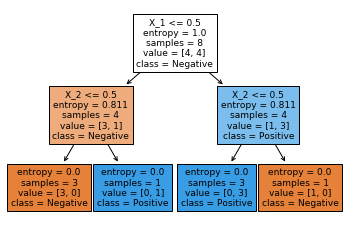

In [23]:
tree.plot_tree(clf.fit(X, y), feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True)

In [31]:
cats = pd.read_csv('cats.csv')

In [32]:
cats

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик
8,8,1,1,1,котик
9,9,0,0,1,котик


In [41]:
cats.drop(['Unnamed: 0'], axis=1, inplace=True)

In [42]:
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [43]:
clf_cats = tree.DecisionTreeClassifier(criterion='entropy')

In [45]:
X = cats[['Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = cats['Вид']

In [47]:
fitted = clf_cats.fit(X, y)

[Text(167.4, 163.07999999999998, 'Лазает по деревьям <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]\nclass = Negative'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Positive'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = Negative')]

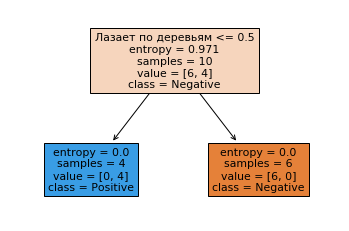

In [48]:
tree.plot_tree(fitted, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True)

In [74]:
E_sh_sob=(1/1)*np.log2((1/1)) - 0
E_sh_kot=-(4/9)*np.log2((4/9)) - (5/9)*np.log2((5/9))
E_gav_sob=0 - (5/5)*np.log2((5/5))
E_gav_kot=-(4/5)*np.log2((4/5)) - (1/5)*np.log2((1/5))
E_laz_sob=0 - (6/6)*np.log2((6/6))
E_laz_kot=-(4/4)*np.log2((4/4)) - 0

In [83]:
E = -(4/10)*np.log2((4/10)) - (6/10)*np.log2((6/10))

IG_sh = E - (1/10)*E_sh_sob - (9/10)*E_sh_kot

IG_gav = E - (5/10)*E_gav_sob - (5/10)*E_gav_kot

IG_laz = E - (6/10)*E_laz_sob - (6/10)*E_laz_kot

In [86]:
IG_laz

0.9709505944546686

посчитаем Information Gain по данным. Определим значения IG для фичей Шерстист, Гавкает и Лазает по деревьям.

In [89]:
from scipy.stats import entropy

def is_entropy(data):
    return entropy(data.Вид.value_counts() / len(data), base=2)

def information_gain(data, feature):
      entropy_1 = is_entropy(data[data[feature] == 0])
      entropy_2 = is_entropy(data[data[feature] == 1])
      n = len(data)
      n0 = len(data[data[feature] == 0])
      n1 = len(data[data[feature] == 1])
      return is_entropy(data) - entropy_1 * n0 / n - entropy_2 * n1 / n

In [90]:
print('IG по шертистости: ', information_gain(cats, 'Шерстист'))
print('IG по голосу: ', information_gain(cats, 'Гавкает'))
print('IG по деревьям: ', information_gain(cats, 'Лазает по деревьям'))

IG по шертистости:  0.07898214060026876
IG по голосу:  0.6099865470109876
IG по деревьям:  0.9709505944546688


In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection  import train_test_split

In [10]:
data = pd.read_csv('../../songs.csv')

In [11]:
data

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Pop,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,abba,Pop,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,abba,Pop,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,gangstarr,Hip-Hop,Take this for example young brothers want rep\...,1996,34,0,0,5


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

depth = 1
while True:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    precision = precision_score(y_test, predictions, average='micro')
    if precision > 0.78:
        break
    else:
        depth += 1

NameError: name 'X' is not defined